In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load your Dataset

In [ ]:
import pandas as pd

# Load the dataset to inspect it
file_path = '/content/drive/MyDrive/TCS_Gen AI_SDG_Capstone/Code/heart_disease_uci_cleaned.csv'
df = pd.read_csv(file_path)

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Login to HuggingFace using your HuggingFace Token
Login to Huggingface account and navigate to Tokens --> https://huggingface.co/settings/tokens

Create a Token --> Save it in your local, you need to login using this token everytime you do a fresh run of the code.

Use the below code to login.

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


# Load Transformers Llama-2 Model and Tokenizers

Access this link to choose your choice of model and then click "Use this Model".

Link: https://huggingface.co/meta-llama/Llama-2-7b-chat-hf

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-chat-hf")
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-chat-hf")
model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
      )
    )
    (no

In [ ]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.676375,normal,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,False,0.878788,flat,0.676375,normal,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,0.676375,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,False,0.878788,flat,0.676375,fixed defect,0


In [ ]:
print(tokenizer.eos_token)

</s>


# Approach-1: Baseline Prompt

In [ ]:
import torch
import pandas as pd
from io import StringIO
import re

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

example_rows = df.head()  # Use first 5 rows as examples
examples = example_rows.to_string()
column_names = df.columns.tolist()

# Updated prompt to encourage unique values for each record
base_prompt_template = f"""
Generate exactly 5 unique records in a table format with the following columns:
id, age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num
Each record should:
- Have distinct values for each column, especially in columns like age, sex, dataset, cp, etc.
- Maintain the same structure as the provided examples, with values that match the typical range and type.
- Use vertical bars (|) to separate columns.
- Ensure that each record has unique values different from the other records.
"""

# Function to generate synthetic records
def generate_synthetic_records(prompt):
    # Encode the prompt
    input_ids = tokenizer(prompt, return_tensors="pt").to(device).input_ids
    input_token_len = input_ids.shape[-1]

    # Generate text with parameters for diversity
    outputs = model.generate(
        input_ids=input_ids,
        max_new_tokens=1400,
        temperature=1.0,  # Increase temperature for more variability
        top_p=0.9,
        do_sample=True
    )

    # Decode the generated text
    generated_text = tokenizer.decode(outputs[0][input_token_len:], skip_special_tokens=True)
    print("Generated text for debugging:", generated_text)  # Print to inspect structure

    # Return the generated text
    return generated_text

# Function to clean and parse the generated text
def parse_generated_text(generated_text):
    # Remove non-data lines and separators (like the descriptive lines)
    data_lines = []
    for line in generated_text.splitlines():
        # Only keep lines with data (that contain '|' and are not headers or dividers)
        if "|" in line and "---" not in line and "id" not in line:
            # Replace multiple spaces or `|` symbols with a single comma
            cleaned_line = re.sub(r'\s*\|\s*', ',', line.strip())
            cleaned_line = re.sub(r',+', ',', cleaned_line)  # Replace multiple commas with one

            # Split the line into columns and keep only the first 16 elements
            split_line = cleaned_line.split(",")
            if len(split_line) > 16:
                split_line = split_line[:16]
            cleaned_line = ",".join(split_line)

            data_lines.append(cleaned_line)

    # Join cleaned data lines into a single string
    cleaned_text = "\n".join(data_lines)

    # Read the cleaned text into a DataFrame
    df = pd.read_csv(StringIO(cleaned_text), header=None)
    df.columns = ["id", "age", "sex", "dataset", "cp", "trestbps", "chol", "fbs",
                  "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

    # Print parsed DataFrame to inspect structure
    print("Parsed DataFrame:", df.head())
    return df

# Generate the records
generated_text = generate_synthetic_records(base_prompt_template)

# Parse the generated text into a DataFrame
df_generated = parse_generated_text(generated_text)

# Display the DataFrame
print(df_generated.head())

# Save to CSV
output_path = "/content/drive/MyDrive/TCS_GenAI_SDG/Code/synthetic_heart_disease_data_Nov_P1.csv"
df_generated.to_csv(output_path, index=False)

print(f"Synthetic data generated and saved to '{output_path}'.")


Generated text for debugging: 
The table should look something like this:

| id | age | sex | dataset | cp | trestbps | chol | fbs | restecg | thalach | exang | oldpeak | slope | ca | thal | num |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | 35 | M | dataset1 | 120 | 50 | 85 | 180 | 50 | 12 | 80 | 140 | 5 | 12 | 1 | 10 | 1 |
| 2 | 27 | F | dataset2 | 100 | 40 | 65 | 150 | 30 | 10 | 70 | 120 | 6 | 12 | 1 | 11 | 1 |
| 3 | 42 | M | dataset3 | 150 | 60 | 90 | 200 | 40 | 15 | 85 | 160 | 7 | 13 | 1 | 12 | 1 |
| 4 | 55 | F | dataset4 | 180 | 70 | 100 | 250 | 50 | 18 | 90 | 190 | 8 | 14 | 1 | 13 | 1 |
| 5 | 60 | M | dataset5 | 200 | 80 | 120 | 300 | 60 | 20 | 100 | 210 | 9 | 15 | 1 | 14 | 1 |

I hope this is what you are looking for! Let me know if you have any questions.
Parsed DataFrame:    id  age  sex dataset        cp  trestbps  chol  fbs  restecg  thalach  \
0 NaN    1   35       M  dataset1       120    50   85      180       50

# Approach-2: Few-Shot Learning

In [ ]:
import torch
import pandas as pd
import re

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Refined prompt with stricter instructions
base_prompt_template = f"""
Generate exactly 20 unique records in a table format with the following columns:

age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num
25, Female, Hungary, non-angina, 120, 240, True, normal, 150, False, 2.3, flat, 0, normal, 0
35, Female, Switzerland, non-angina, 140, 213, False, lv hypertrophy, 210, True, 1.7, upsloping, 1, fixed defect, 2

Each record should:

- Follow these constraints for data types and values:

  - age: integer between 25 and 80
  - sex: 'Male' or 'Female'
  - dataset: one of 'Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'
  - cp: one of 'typical angina', 'atypical angina', 'non-angina', 'asymptomatic'
  - trestbps: integer between 90 and 200
  - chol: integer between 150 and 400
  - fbs: 'True' or 'False' only
  - restecg: 'normal' or 'lv hypertrophy'
  - thalch: integer between 70 and 200
  - exang: 'True' or 'False' only
  - oldpeak: float between 0.0 and 6.0
  - slope: 'upsloping', 'flat', or 'downsloping'
  - ca: integer between 0 and 4
  - thal: 'normal', 'fixed defect', or 'reversable defect'
  - num: integer between 0 and 3

- Use commas to separate columns.
- **Do not include headers, dividers, or any additional text.**
- **Generate only the data records.**
- **Do not include headers, dividers, or any additional text.**
- **Generate only the data records.**
"""

# Function to generate synthetic records using the model
def generate_synthetic_records(prompt):
    input_ids = tokenizer(prompt, return_tensors="pt").to(device).input_ids
    input_token_len = input_ids.shape[-1]
    outputs = model.generate(
        input_ids,
        max_new_tokens=1800,
        temperature=0.7,
        top_p=0.85,
        do_sample=True
    )
    generated_text = tokenizer.decode(outputs[0][input_token_len:], skip_special_tokens=True)
    print("Text generated for debugging:\n", generated_text)
    return generated_text



# Enhanced parsing function to process only valid data lines
def parse_and_validate_generated_text(generated_texts):
    data_lines = []
    expected_columns = 15  # Number of expected columns in each data line
    for generated_text in generated_texts:
        for line in generated_text.strip().splitlines():
            line = line.strip()
            # Skip empty lines
            if not line:
                continue
            # Remove any extraneous labels or numbering
            line = re.sub(r'^\d+\.\s*', '', line)
            # Skip non-data lines containing notes or headers
            if any(keyword in line.lower() for keyword in ['record','append','please', 'note', 'here are', '---','age',']','print']):
                continue
            # Split and clean columns by commas
            split_line = [field.strip() for field in line.split(',') if field.strip()]
            print(f"Parsed line: {split_line} !! Length: {len(split_line)}")
            # Only include lines with the correct number of columns
            if len(split_line) == expected_columns:
                data_lines.append(split_line)
            else:
                print(f"Skipping line due to unexpected number of columns: {len(split_line)}")
    # Create DataFrame
    df = pd.DataFrame(data_lines, columns=[
        "age", "sex", "dataset", "cp", "trestbps", "chol", "fbs",
        "restecg", "thalch", "exang", "oldpeak", "slope", "ca", "thal", "num"
    ])
    # Type conversion
    try:
        df["age"] = df["age"].astype(int)
        df["trestbps"] = df["trestbps"].astype(int)
        df["chol"] = df["chol"].astype(int)
        df["fbs"] = df["fbs"].str.lower().map({"true": True, "false": False})
        df["ca"] = df["ca"].astype(int)
        df["thalch"] = df["thalch"].astype(int)
        df["exang"] = df["exang"].str.lower().map({"true": True, "false": False})
        df["oldpeak"] = df["oldpeak"].astype(float)
        df["num"] = df["num"].astype(int)
    except ValueError as e:
        print("Data type conversion error:", e)
    return df



# # Generate synthetic data in batches
# synthetic_data_batches = []
# for batch_num in range(5):  # Number of batches
#     batch_prompt = base_prompt_template
#     batch_generated_text = generate_synthetic_records(batch_prompt)
#     print(f"Batch {batch_num + 1} generated text:\n", batch_generated_text)
#     synthetic_data_batches.append(batch_generated_text)

# Generate synthetic data until we reach the desired number of records
target_records = 200
synthetic_data_batches = []
data_lines = []

while len(data_lines) < target_records:
    batch_prompt = base_prompt_template
    batch_generated_text = generate_synthetic_records(batch_prompt)
    print(f"Generated text for batch:\n", batch_generated_text)
    parsed_data = parse_and_validate_generated_text([batch_generated_text])
    data_lines.extend(parsed_data.values.tolist())

# Truncate to the target number of records in case we have extra
data_lines = data_lines[:target_records]

# Create DataFrame with the specified columns
df_generated = pd.DataFrame(data_lines, columns=[
    "age", "sex", "dataset", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalch", "exang", "oldpeak", "slope", "ca", "thal", "num"
])


# Concatenate generated text and parse with validation
# concatenated_text = "\n".join(synthetic_data_batches)
# print("Concatenated text:\n", concatenated_text)
# df_generated = parse_and_validate_generated_text([concatenated_text])

# Save the DataFrame to an Excel file
output_path = "/content/drive/MyDrive/TCS_GenAI_SDG/Code/synthetic_heart_disease_data_Nov_P1_Fin_B.xlsx"
df_generated.to_excel(output_path, index=False)

print(f"Synthetic data generated and saved to '{output_path}'.")

Text generated for debugging:
 
I hope this helps! Let me know if you have any questions or need further clarification.
Generated text for batch:
 
I hope this helps! Let me know if you have any questions or need further clarification.
Parsed line: ['I hope this helps! Let me know if you have any questions or need further clarification.'] !! Length: 1
Skipping line due to unexpected number of columns: 1
Text generated for debugging:
 
Here are the 20 records:

25, Female, Hungary, non-angina, 120, 240, True, normal, 150, False, 2.3, flat, 0, normal, 0
35, Female, Switzerland, non-angina, 140, 213, False, lv hypertrophy, 210, True, 1.7, upsloping, 1, fixed defect, 2
40, Male, Cleveland, typical angina, 160, 280, True, lv hypertrophy, 240, False, 3.5, downsloping, 2, reversable defect, 3
45, Female, Hungary, atypical angina, 130, 200, True, lv hypertrophy, 190, False, 2.8, upsloping, 0, fixed defect, 1
50, Male, Switzerland, non-angina, 150, 230, True, normal, 180, False, 2.1, flat, 0, n

In [ ]:
df_generated

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,25,Female,Hungary,non-angina,120,240,True,normal,150,False,2.3,flat,0,normal,0
1,35,Female,Switzerland,non-angina,140,213,False,lv hypertrophy,210,True,1.7,upsloping,1,fixed defect,2
2,40,Male,Cleveland,typical angina,160,280,True,lv hypertrophy,240,False,3.5,downsloping,2,reversable defect,3
3,45,Female,Hungary,atypical angina,130,200,True,lv hypertrophy,190,False,2.8,upsloping,0,fixed defect,1
4,50,Male,Switzerland,non-angina,150,230,True,normal,180,False,2.1,flat,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,25,Female,Hungary,non-angina,120,240,True,normal,150,False,2.3,flat,0,normal,0
196,35,Female,Switzerland,non-angina,140,213,False,lv hypertrophy,210,True,1.7,upsloping,1,fixed defect,2
197,40,Male,Cleveland,typical angina,160,220,True,lv hypertrophy,200,False,3.4,downsloping,2,reversable defect,3
198,45,Female,Hungary,non-angina,130,200,True,normal,170,False,2.1,flat,0,normal,0


#Approach-3: Chain of Thought Prompt

In [ ]:
import torch
import pandas as pd
import re

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Chain-of-Thought prompt to guide model reasoning for data generation
base_prompt_template = f"""
Generate exactly 20 unique records in a table format with the following columns:

age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num
25, Female, Hungary, non-angina, 120, 240, True, normal, 150, False, 2.3, flat, 0, normal, 0
35, Female, Switzerland, non-angina, 140, 213, False, lv hypertrophy, 210, True, 1.7, upsloping, 1, fixed defect, 2

Each record should satisfy these conditions for realistic distribution:
1. Consider age, sex, and dataset first. Ensure age varies between 25 and 80, with an equal mix of male and female. The dataset values should be evenly distributed among 'Cleveland', 'Hungary', 'Switzerland', and 'VA Long Beach'.
2. Determine the 'cp' (chest pain type) by considering the dataset and age. For older ages, select 'atypical angina' or 'non-angina' more frequently.
3. Use a realistic range for 'trestbps' and 'chol', ensuring values are within the range (90-200) for 'trestbps' and (150-400) for 'chol'. Ensure distribution matches real cases where high cholesterol is more common at older ages.
4. For binary fields like 'fbs' and 'exang', distribute values evenly. True should appear in approximately half the records for each field.
5. Consider 'restecg' based on chest pain type and sex. For example, use 'lv hypertrophy' more for cases with 'typical angina' or 'atypical angina'.
6. Set 'thalch' within 70-200. Make sure the distribution for 'thalch' is realistic, with slightly higher values for those with higher cholesterol.
7. 'oldpeak' should be a float between 0.0 and 6.0, with higher values slightly more frequent for older records or those with 'asymptomatic' cp.
8. For 'slope' and 'ca', distribute the values according to cp type. For example, use 'upsloping' for 'typical angina' cases and 'flat' for 'asymptomatic' cases.
9. 'thal' should be 'normal' for most cases, but include 'fixed defect' and 'reversable defect' occasionally for older ages.
10. 'num' should vary between 0 and 3, reflecting a balanced mix of classifications.

Follow the constraints exactly and generate each line with commas to separate fields, without any additional text, headers, or numbering.
"""

# Function to generate synthetic records using the model
def generate_synthetic_records(prompt):
    input_ids = tokenizer(prompt, return_tensors="pt").to(device).input_ids
    input_token_len = input_ids.shape[-1]
    outputs = model.generate(
        input_ids,
        max_new_tokens=2000,
        temperature=0.7,
        top_p=0.85,
        do_sample=True
    )
    generated_text = tokenizer.decode(outputs[0][input_token_len:], skip_special_tokens=True)
    print("Text generated for debugging:\n", generated_text)
    return generated_text

# Parsing function for valid data lines
def parse_and_validate_generated_text(generated_texts):
    data_lines = []
    expected_columns = 15  # Number of expected columns in each data line
    for generated_text in generated_texts:
        for line in generated_text.strip().splitlines():
            line = line.strip()
            # Skip empty lines
            if not line:
                continue
            # Remove extraneous text
            line = re.sub(r'^\d+\.\s*', '', line)
            if any(keyword in line.lower() for keyword in ['record', 'append', 'please', 'note', 'here are', '---', 'age']):
                continue
            # Split and clean columns by commas
            split_line = [field.strip() for field in line.split(',') if field.strip()]
            print(f"Parsed line: {split_line} !! Length: {len(split_line)}")
            if len(split_line) == expected_columns:
                data_lines.append(split_line)
            else:
                print(f"Skipping line due to unexpected number of columns: {len(split_line)}")
    df = pd.DataFrame(data_lines, columns=[
        "age", "sex", "dataset", "cp", "trestbps", "chol", "fbs",
        "restecg", "thalch", "exang", "oldpeak", "slope", "ca", "thal", "num"
    ])
    # Type conversion
    try:
        df["age"] = df["age"].astype(int)
        df["trestbps"] = df["trestbps"].astype(int)
        df["chol"] = df["chol"].astype(int)
        df["fbs"] = df["fbs"].str.lower().map({"true": True, "false": False})
        df["ca"] = df["ca"].astype(int)
        df["thalch"] = df["thalch"].astype(int)
        df["exang"] = df["exang"].str.lower().map({"true": True, "false": False})
        df["oldpeak"] = df["oldpeak"].astype(float)
        df["num"] = df["num"].astype(int)
    except ValueError as e:
        print("Data type conversion error:", e)
    return df

# Generate synthetic data until reaching target
target_records = 200
synthetic_data_batches = []
data_lines = []

while len(data_lines) < target_records:
    batch_prompt = base_prompt_template
    batch_generated_text = generate_synthetic_records(batch_prompt)
    parsed_data = parse_and_validate_generated_text([batch_generated_text])
    data_lines.extend(parsed_data.values.tolist())

# Truncate to target records if extra
data_lines = data_lines[:target_records]

# Create DataFrame with specified columns
df_generated_cot = pd.DataFrame(data_lines, columns=[
    "age", "sex", "dataset", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalch", "exang", "oldpeak", "slope", "ca", "thal", "num"
])

# Save to Excel
output_path = "/content/drive/MyDrive/TCS_GenAI_SDG/Code/synthetic_heart_disease_data_with_chain_of_thought.xlsx"
df_generated_cot.to_excel(output_path, index=False)

print(f"Synthetic data generated and saved to '{output_path}'.")

Text generated for debugging:
 
For example:

25, Female, Hungary, non-angina, 120, 240, True, normal, 150, False, 2.3, flat, 0, normal, 0

Please generate 20 records following these conditions.
Parsed line: ['For example:'] !! Length: 1
Skipping line due to unexpected number of columns: 1
Parsed line: ['25', 'Female', 'Hungary', 'non-angina', '120', '240', 'True', 'normal', '150', 'False', '2.3', 'flat', '0', 'normal', '0'] !! Length: 15
Text generated for debugging:
 
For example, the first record would be:
25, Female, Hungary, non-angina, 120, 240, True, normal, 150, False, 2.3, flat, 0, normal, 0

Please generate the next 19 records accordingly.
Parsed line: ['25', 'Female', 'Hungary', 'non-angina', '120', '240', 'True', 'normal', '150', 'False', '2.3', 'flat', '0', 'normal', '0'] !! Length: 15
Text generated for debugging:
 
Note: The dataset values are randomly generated and may not match real-world data.
Text generated for debugging:
 
Example output:
age,sex,dataset,cp,trestbps

In [ ]:
df_generated_cot

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,25,Female,Hungary,non-angina,120,240,True,normal,150,False,2.3,flat,0,normal,0
1,25,Female,Hungary,non-angina,120,240,True,normal,150,False,2.3,flat,0,normal,0
2,25,Female,Hungary,non-angina,120,240,True,normal,150,False,2.3,flat,0,normal,0
3,35,Female,Switzerland,non-angina,140,213,False,lv hypertrophy,210,True,1.7,upsloping,1,fixed defect,2
4,25,Female,Hungary,non-angina,120,240,True,normal,150,False,2.3,flat,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,65,Male,Hungary,typical angina,190,320,True,lv hypertrophy,270,False,3.2,upsloping,1,fixed defect,1
196,75,Female,Switzerland,non-angina,210,350,True,lv hypertrophy,230,False,2.5,flat,0,reversable defect,1
197,85,Male,Cleveland,atypical angina,230,400,True,lv hypertrophy,270,False,2.9,upsloping,1,fixed defect,1
198,25,Female,Hungary,non-angina,120,240,True,normal,150,False,2.3,flat,0,normal,0


Summary Statistics Comparison:
                id         age    trestbps        chol      thalch     oldpeak  \
count  720.000000  720.000000  720.000000  720.000000  720.000000  720.000000   
mean   360.000000   -0.434130  -14.917596  -26.024663  -51.204335   -1.567712   
std    207.846238   -8.103239   -9.425100   71.566707  -15.558171    0.279120   
min      0.000000    3.000000  -90.000000 -120.000000  -20.000000   -3.800000   
25%    180.000000    7.000000    0.000000  -22.250000  -30.000000   -1.900000   
50%    360.000000   -1.000000  -10.000000    1.000000  -52.000000   -1.500000   
75%    540.000000  -10.000000  -30.000000   27.000000  -54.000000   -1.300000   
max    720.000000  -18.000000  -40.000000  243.000000 -118.000000    0.100000   

               ca         num  
count  720.000000  720.000000  
mean    -0.278625   -0.624348  
std     -0.804452   -0.533507  
min      0.000000    0.000000  
25%      0.676375    0.000000  
50%      0.176375   -1.000000  
75%     -1.323

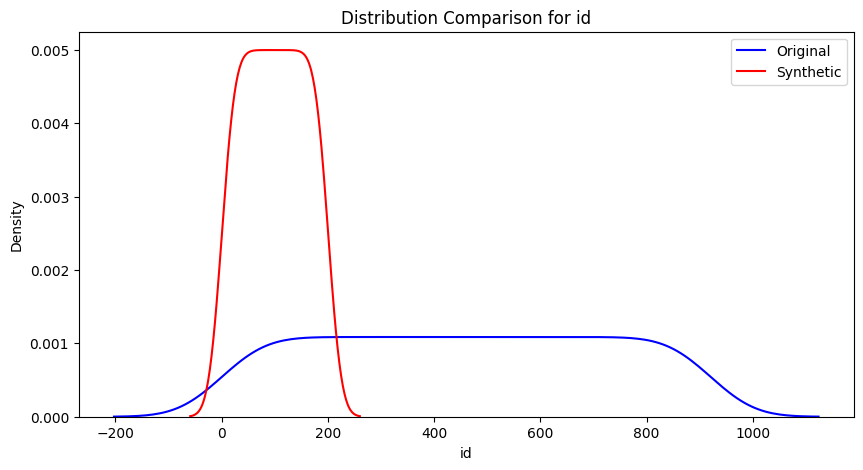

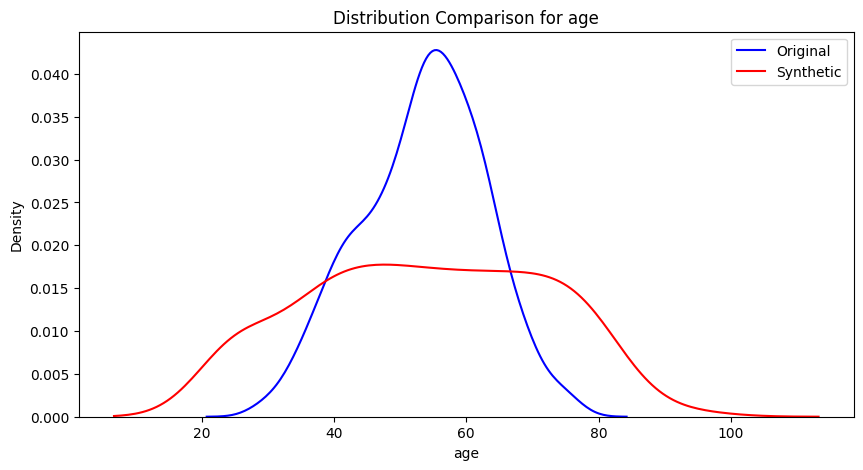

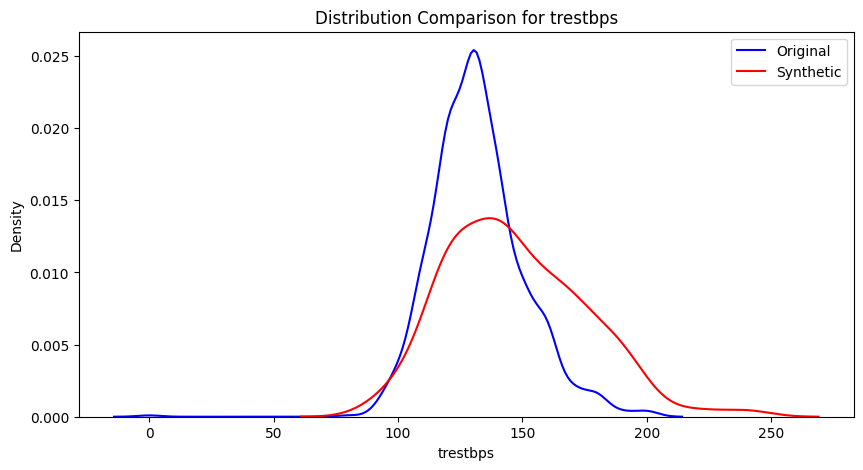

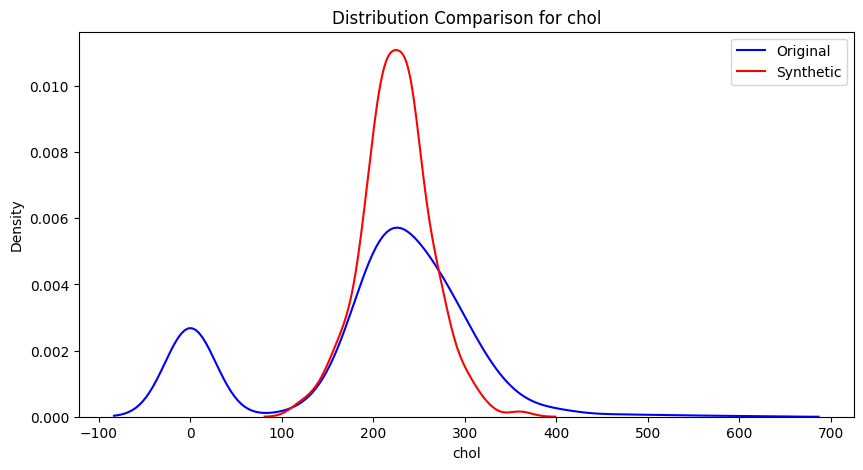

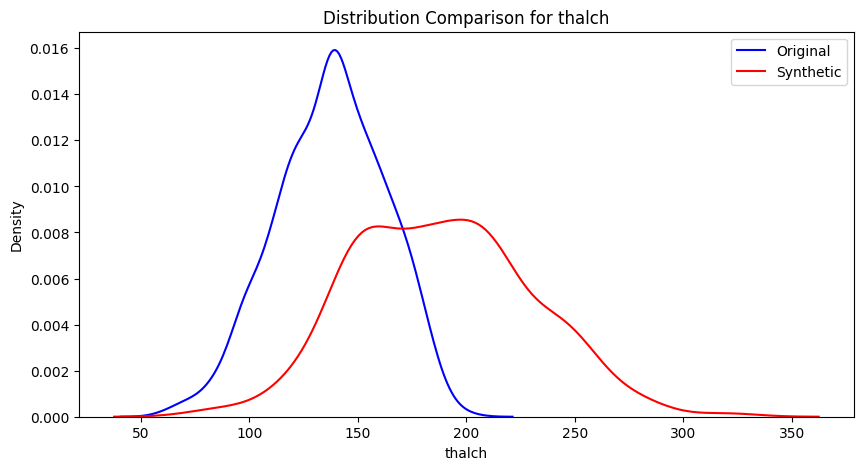

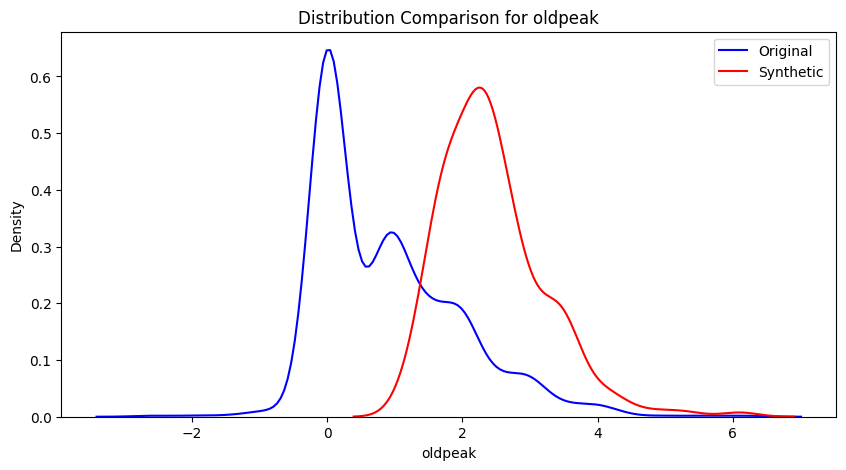

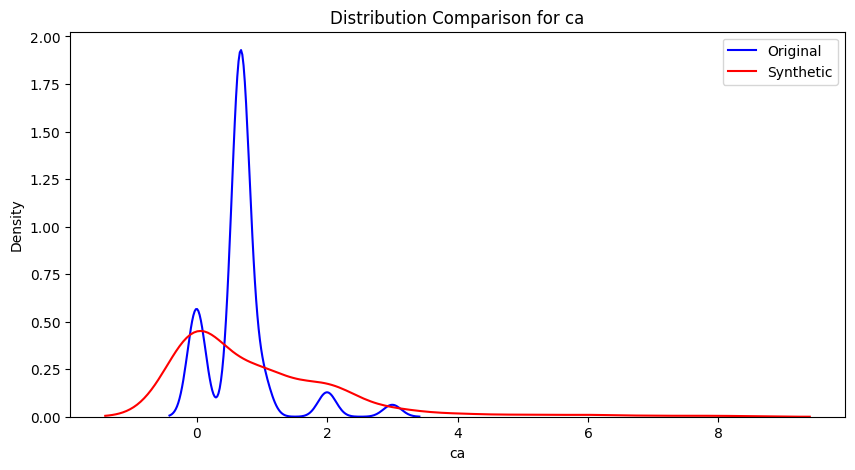

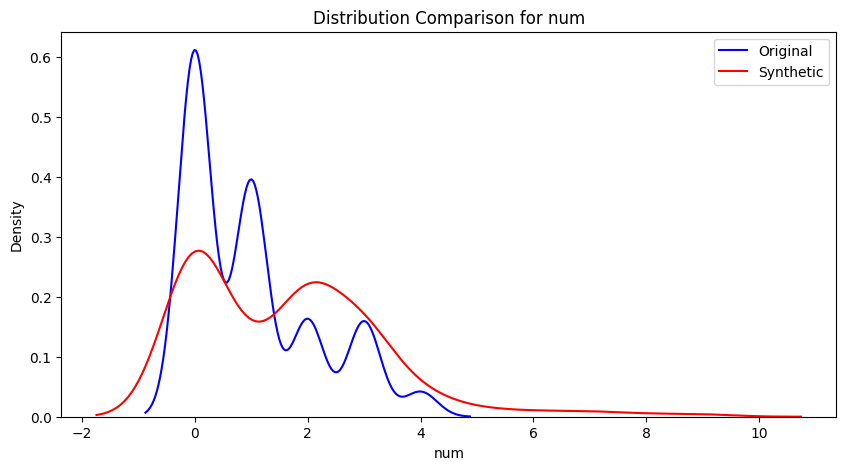

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load your datasets
original_data = pd.read_csv('/content/drive/MyDrive/TCS_Gen AI_SDG_Capstone/Code/heart_disease_uci_cleaned.csv')
synthetic_data = df_generated
synthetic_data.insert(1, 'id', range(1, len(synthetic_data) + 1))


# Select only numeric columns for comparison
numeric_columns = original_data.select_dtypes(include=['number']).columns

# Update the comparison and plotting functions to use only numeric columns
def compare_summary_statistics(original, synthetic):
    return original[numeric_columns].describe() - synthetic[numeric_columns].describe()

def ks_test(original, synthetic):
    from scipy.stats import ks_2samp
    results = {}
    for column in numeric_columns:
        results[column] = ks_2samp(original[column].dropna(), synthetic[column].dropna())
    return results

def compare_correlations(original, synthetic):
    return original[numeric_columns].corr() - synthetic[numeric_columns].corr()

def plot_distributions(original, synthetic):
    import matplotlib.pyplot as plt
    import seaborn as sns
    for column in numeric_columns:
        plt.figure(figsize=(10, 5))
        sns.kdeplot(original[column].dropna(), label='Original', color='blue')
        sns.kdeplot(synthetic[column].dropna(), label='Synthetic', color='red')
        plt.title(f'Distribution Comparison for {column}')
        plt.legend()
        plt.show()

# Execute comparisons using only numeric columns
summary_comparison = compare_summary_statistics(original_data, synthetic_data)
ks_results = ks_test(original_data, synthetic_data)
correlation_difference = compare_correlations(original_data, synthetic_data)

# Display results
print("Summary Statistics Comparison:\n", summary_comparison)
print("\nKolmogorov-Smirnov Test Results:\n", ks_results)
print("\nCorrelation Differences:\n", correlation_difference)

# Plot distributions
plot_distributions(original_data, synthetic_data)

# **Evaluation** **Metrics**

# Synthetic and Original Data Preprocessing for Evaluation

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp, chisquare, energy_distance
from scipy.spatial.distance import jensenshannon
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import rbf_kernel

# Load your datasets
original_df = pd.read_csv('/content/drive/MyDrive/TCS_Gen AI_SDG_Capstone/Code/heart_disease_uci_cleaned.csv')
synthetic_df = df_generated

# Define column types
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']
binary_cols = ['fbs', 'exang']

# Ensure consistent data types
for col in binary_cols:
    original_df[col] = original_df[col].astype(bool)
    synthetic_df[col] = synthetic_df[col].astype(bool)

# Preprocessing: Encode categorical variables
def preprocess_data(df):
    df_processed = df.copy()
    le_dict = {}
    for col in df_processed.columns:
        if df_processed[col].dtype == 'object' or df_processed[col].dtype == 'bool':
            le = LabelEncoder()
            df_processed[col] = le.fit_transform(df_processed[col].astype(str))
            le_dict[col] = le
    return df_processed, le_dict

original_processed, le_dict_original = preprocess_data(original_df)
synthetic_processed, le_dict_synthetic = preprocess_data(synthetic_df)

# Ensure columns are in the same order
synthetic_processed = synthetic_processed[original_processed.columns]
synthetic_processed

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,25,0,1,2,120,240,1,3,150,0,2.3,1,0,1,0
1,2,35,0,2,2,140,213,0,0,210,1,1.7,2,1,0,2
2,3,40,1,0,3,160,280,1,0,240,0,3.5,0,2,2,3
3,4,45,0,1,1,130,200,1,0,190,0,2.8,2,0,0,1
4,5,50,1,2,2,150,230,1,3,180,0,2.1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,25,0,1,2,120,240,1,3,150,0,2.3,1,0,1,0
196,197,35,0,2,2,140,213,0,0,210,1,1.7,2,1,0,2
197,198,40,1,0,3,160,220,1,0,200,0,3.4,0,2,2,3
198,199,45,0,1,2,130,200,1,3,170,0,2.1,1,0,1,0


# **1. Statistical Similarity Measures**
**Kolmogorov-Smirnov Test and Wasserstein Distance for Numerical Variables for Few-Shot**

<ipython-input-11-14fb7ae1fb1b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_df[col], label='Original', shade=True)
<ipython-input-11-14fb7ae1fb1b>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_df[col], label='Synthetic', shade=True)


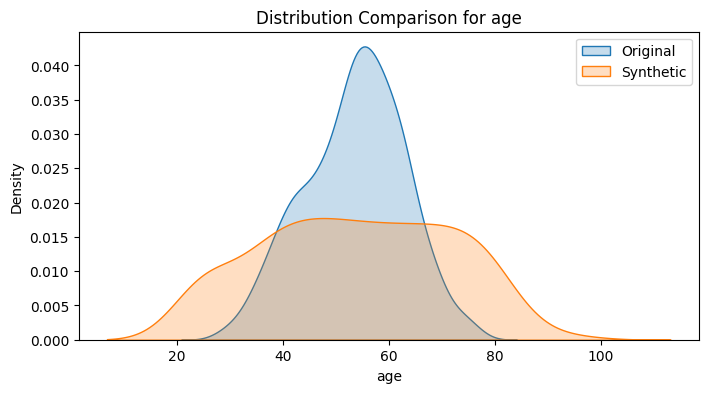

<ipython-input-11-14fb7ae1fb1b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_df[col], label='Original', shade=True)
<ipython-input-11-14fb7ae1fb1b>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_df[col], label='Synthetic', shade=True)


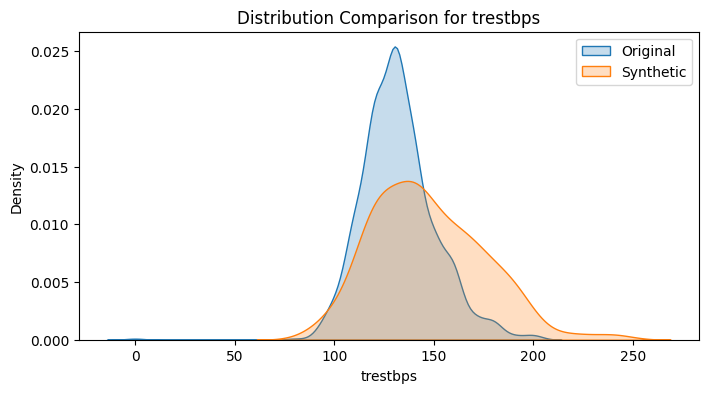

<ipython-input-11-14fb7ae1fb1b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_df[col], label='Original', shade=True)
<ipython-input-11-14fb7ae1fb1b>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_df[col], label='Synthetic', shade=True)


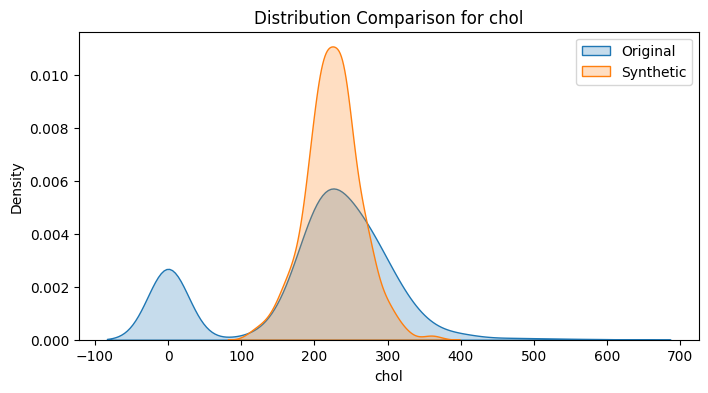

<ipython-input-11-14fb7ae1fb1b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_df[col], label='Original', shade=True)
<ipython-input-11-14fb7ae1fb1b>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_df[col], label='Synthetic', shade=True)


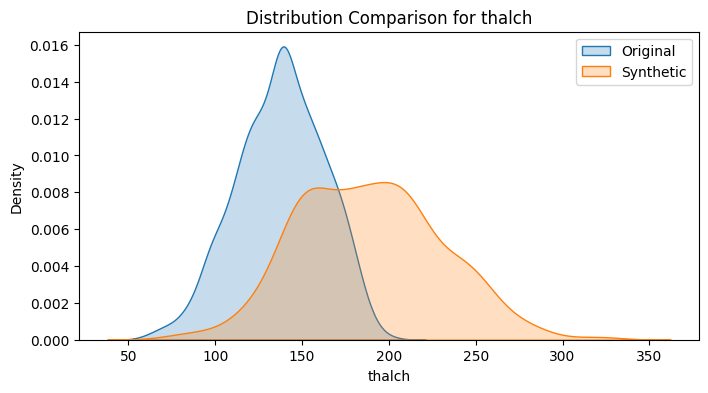

<ipython-input-11-14fb7ae1fb1b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_df[col], label='Original', shade=True)
<ipython-input-11-14fb7ae1fb1b>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_df[col], label='Synthetic', shade=True)


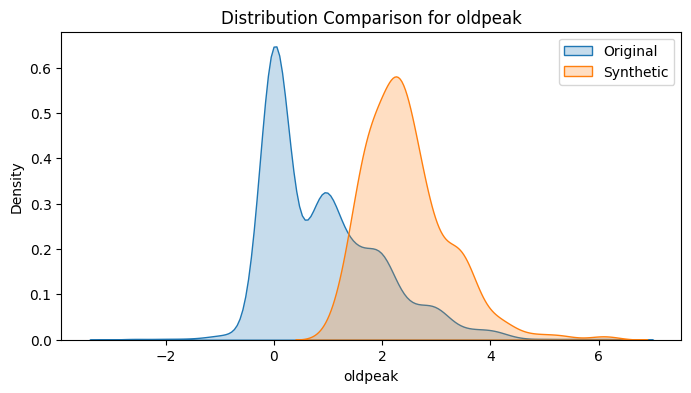

<ipython-input-11-14fb7ae1fb1b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_df[col], label='Original', shade=True)
<ipython-input-11-14fb7ae1fb1b>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_df[col], label='Synthetic', shade=True)


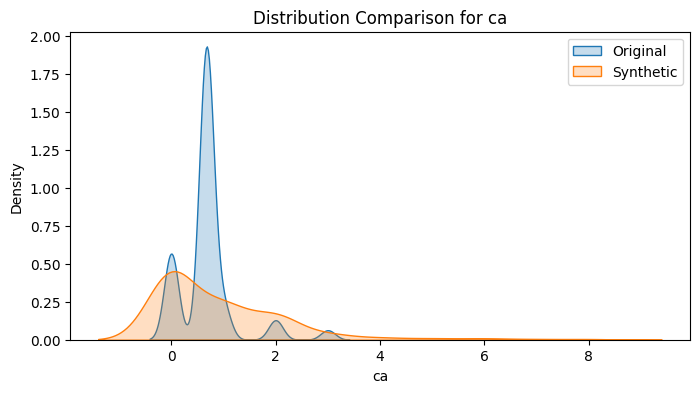

     Column  KS Statistic    KS p-value  Wasserstein Distance
0       age      0.243043  5.154883e-09              7.344565
1  trestbps      0.301957  9.569842e-14             15.045857
2      chol      0.191304  9.787800e-06             49.428576
3    thalch      0.574783  3.430351e-51             51.204335
4   oldpeak      0.702826  8.630352e-80              1.567930
5        ca      0.360870  1.394996e-19              0.688861


In [ ]:
def compare_numerical_distributions(original_df, synthetic_df, columns):
    distribution_metrics = []
    for col in columns:
        ks_stat, ks_p_value = ks_2samp(original_df[col], synthetic_df[col])
        wd = wasserstein_distance(original_df[col], synthetic_df[col])
        distribution_metrics.append({
            'Column': col,
            'KS Statistic': ks_stat,
            'KS p-value': ks_p_value,
            'Wasserstein Distance': wd
        })
        # Plot distributions
        plt.figure(figsize=(8, 4))
        sns.kdeplot(original_df[col], label='Original', shade=True)
        sns.kdeplot(synthetic_df[col], label='Synthetic', shade=True)
        plt.title(f'Distribution Comparison for {col}')
        plt.legend()
        plt.show()
    return pd.DataFrame(distribution_metrics)

numerical_distribution_metrics = compare_numerical_distributions(
    original_processed, synthetic_processed, numerical_cols)
print(numerical_distribution_metrics)

# **2. Machine Learning Utility Metrics**



# 1) Train on Original, Test on Synthetic (TSOR)

TRAIN ON ORIGINAL, TEST ON SYNTHETIC Evaluation:
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        76
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        52
           3       1.00      0.03      0.05        36
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.39       200
   macro avg       0.14      0.10      0.06       200
weighted avg       0.33      0.39      0.22       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


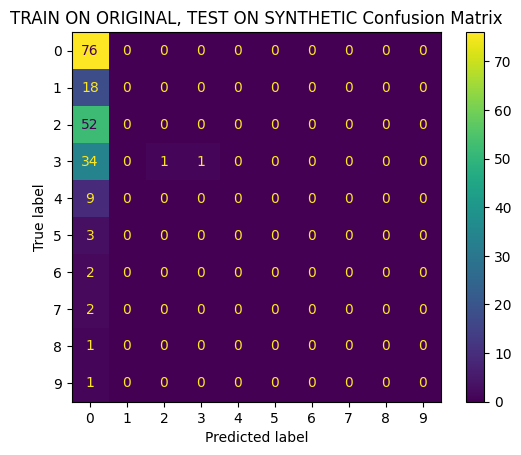

In [ ]:
# Define target and features
target_column = 'num'
feature_columns = [col for col in original_processed.columns if col != target_column]

# Split the original data
X_orig = original_processed[feature_columns]
y_orig = original_processed[target_column]
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(
    X_orig, y_orig, test_size=0.3, random_state=42)

# Prepare synthetic data
X_synth = synthetic_processed[feature_columns]
y_synth = synthetic_processed[target_column]


# TSOR: Train on Original, Test on Synthetic
model_tsor = RandomForestClassifier(n_estimators=100, random_state=42)
model_tsor.fit(X_orig_train, y_orig_train)
y_pred_tsor = model_tsor.predict(X_synth)
print("TRAIN ON ORIGINAL, TEST ON SYNTHETIC Evaluation:")
print(classification_report(y_synth, y_pred_tsor))

# Plot confusion matrices


# TSOR Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_synth, y_pred_tsor)
plt.title('TRAIN ON ORIGINAL, TEST ON SYNTHETIC Confusion Matrix')
plt.show()

# **3. Correlation Analysis**

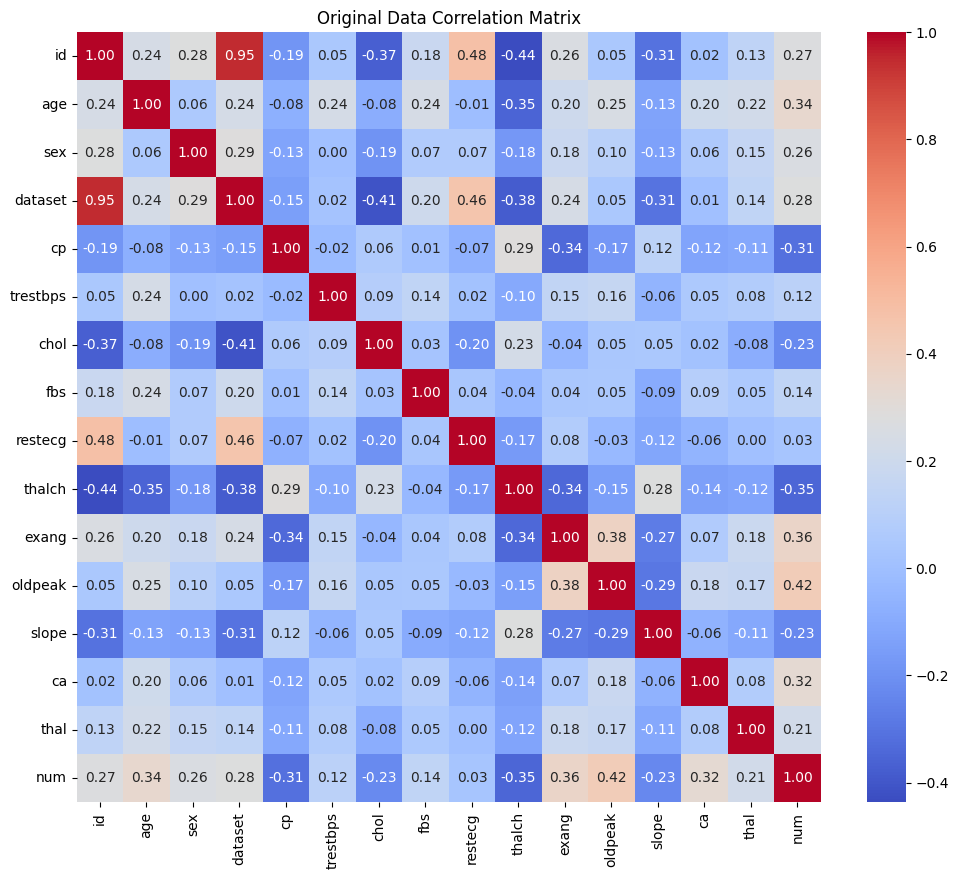

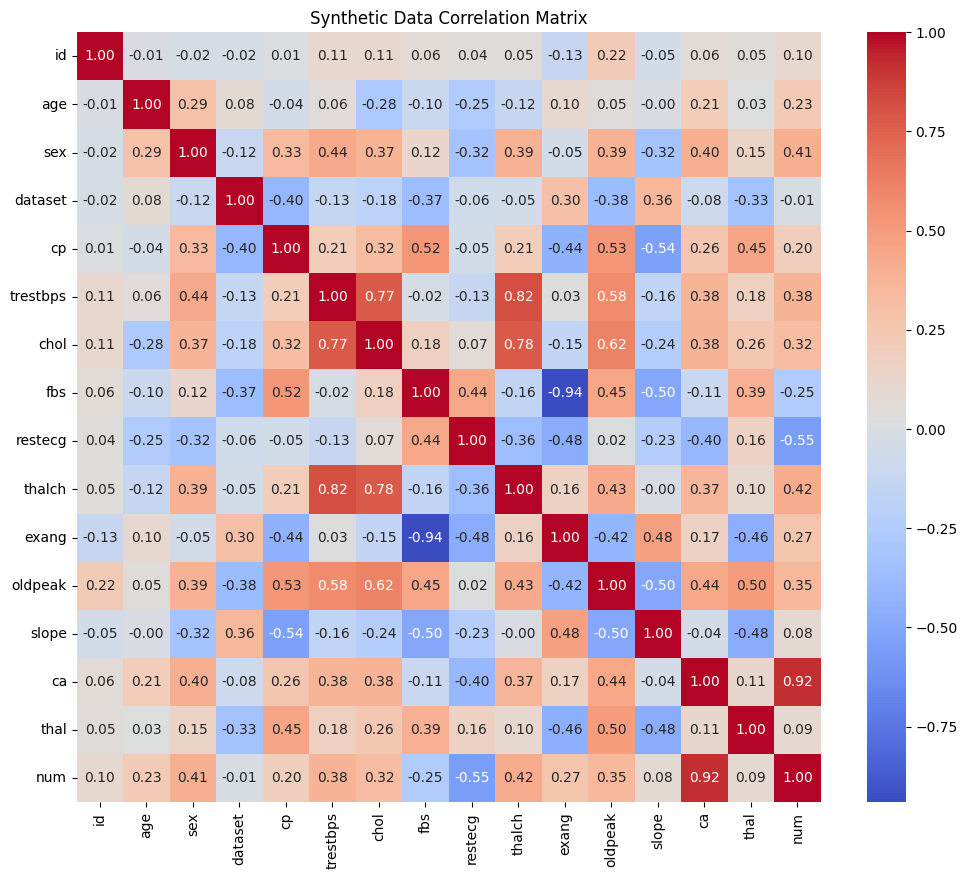

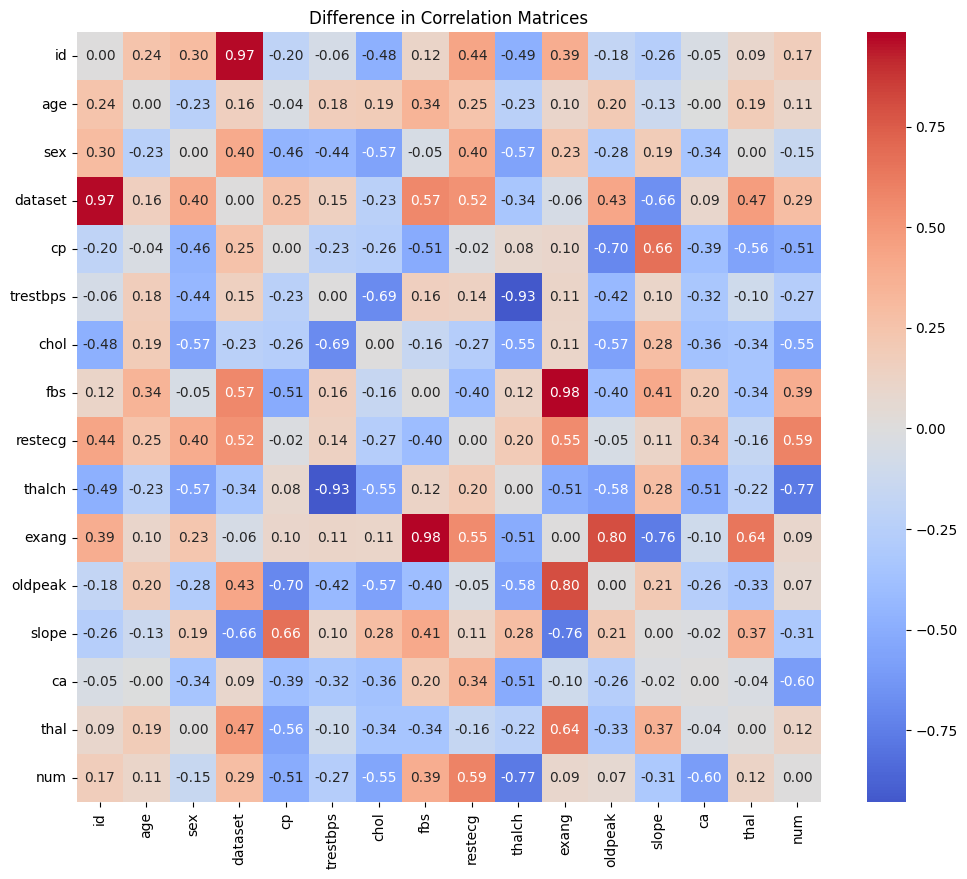

In [ ]:
# Compute correlation matrices
corr_original = original_processed.corr()
corr_synthetic = synthetic_processed.corr()

# Difference between the correlation matrices
corr_diff = corr_original - corr_synthetic

# Visualize the original correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_original, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Original Data Correlation Matrix')
plt.show()

# Visualize the synthetic correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_synthetic, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Synthetic Data Correlation Matrix')
plt.show()

# Visualize the difference
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Difference in Correlation Matrices')
plt.show()


 **4. Distribution Comparison using Divergence measures**

a) Kullback-Leibler (KL) Divergence

KL Divergence for sex: 0.24799470747292032
KL Divergence for cp: 1.6458665086944766
KL Divergence for restecg: 2.9243726321892614
KL Divergence for slope: 0.1234656652553659
KL Divergence for thal: 0.1768056298065422
KL Divergence for fbs: 0.3766692609388922
KL Divergence for exang: 0.00374162866511632


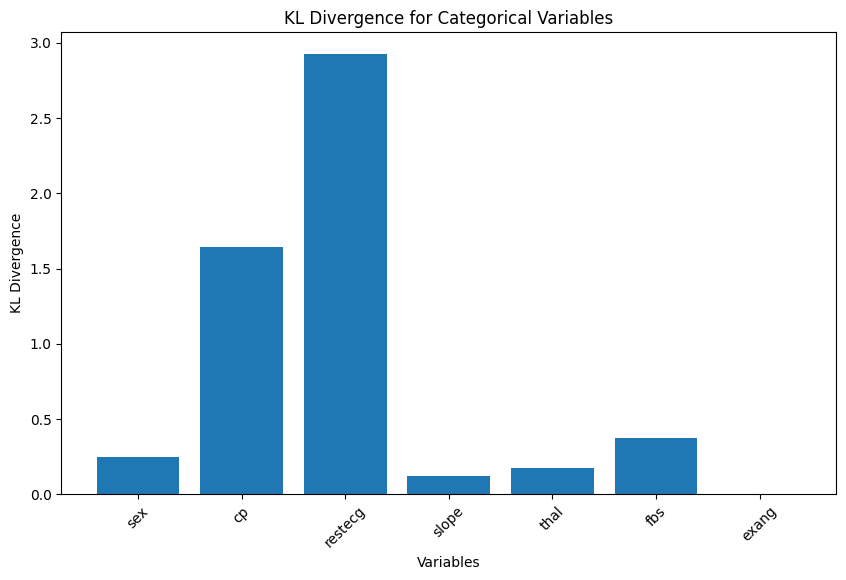

In [ ]:
def compute_kl_divergence(p, q):
    epsilon = 1e-10
    p = p + epsilon
    q = q + epsilon
    return np.sum(p * np.log(p / q))

kl_divergences = {}

for col in categorical_cols + binary_cols:
    orig_counts = original_processed[col].value_counts(normalize=True).sort_index()
    synth_counts = synthetic_processed[col].value_counts(normalize=True).sort_index()
    all_categories = orig_counts.index.union(synth_counts.index)
    p = orig_counts.reindex(all_categories, fill_value=0).values
    q = synth_counts.reindex(all_categories, fill_value=0).values
    kl_div = compute_kl_divergence(p, q)
    kl_divergences[col] = kl_div
    print(f"KL Divergence for {col}: {kl_div}")

# Plot KL Divergences
plt.figure(figsize=(10, 6))
plt.bar(kl_divergences.keys(), kl_divergences.values())
plt.title('KL Divergence for Categorical Variables')
plt.xlabel('Variables')
plt.ylabel('KL Divergence')
plt.xticks(rotation=45)
plt.show()

# **Interpretation:**

Lower the value, more closer the distribtuion of both datasets.

# Summary Statistics for Chain-of-Thought Approach

Summary Statistics Comparison:
                id         age    trestbps        chol      thalch     oldpeak  \
count  720.000000  720.000000  720.000000  720.000000  720.000000  720.000000   
mean   360.000000   -3.164130   -6.417596  -37.739663  -46.154335   -1.565712   
std    207.846238  -32.153109   -7.878373   70.419483  -19.394933    0.448878   
min      0.000000    3.000000  -80.000000 -150.000000  -60.000000   -4.100000   
25%    180.000000   22.000000    0.000000  -35.250000  -30.000000   -2.200000   
50%    360.000000   14.000000    0.000000  -19.000000  -22.000000   -1.500000   
75%    540.000000  -15.000000  -20.000000   27.000000  -54.000000   -1.225000   
max    720.000000 -128.000000  -40.000000  203.000000  -98.000000    1.400000   

               ca         num  
count  720.000000  720.000000  
mean     0.376375    0.185652  
std      0.082260    0.319719  
min      0.000000    0.000000  
25%      0.676375    0.000000  
50%      0.676375    0.000000  
75%     -0.323

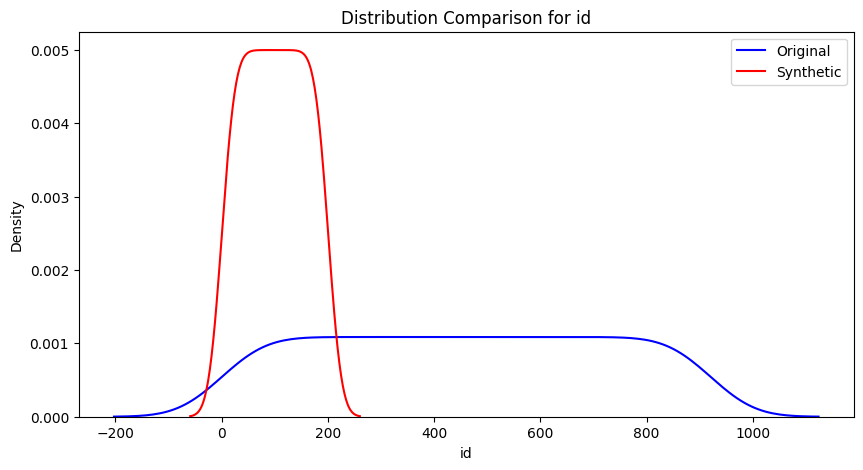

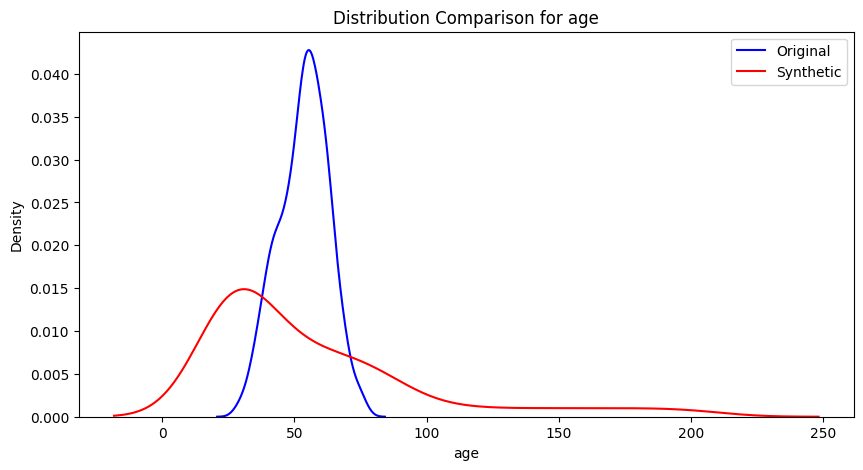

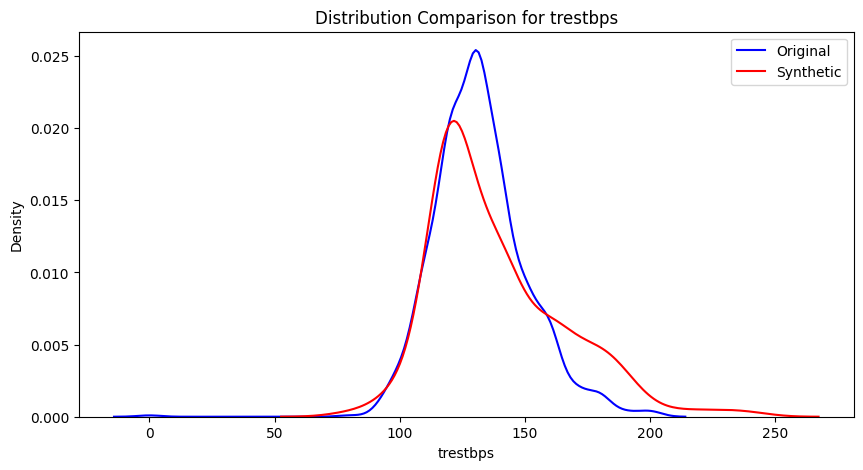

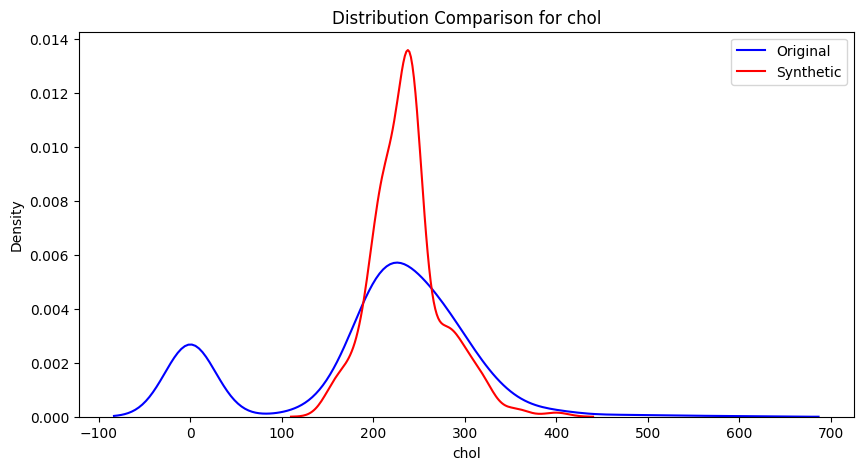

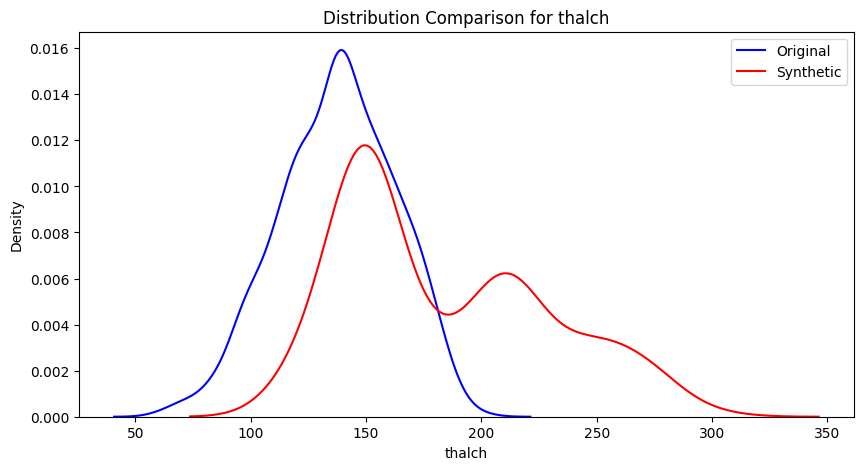

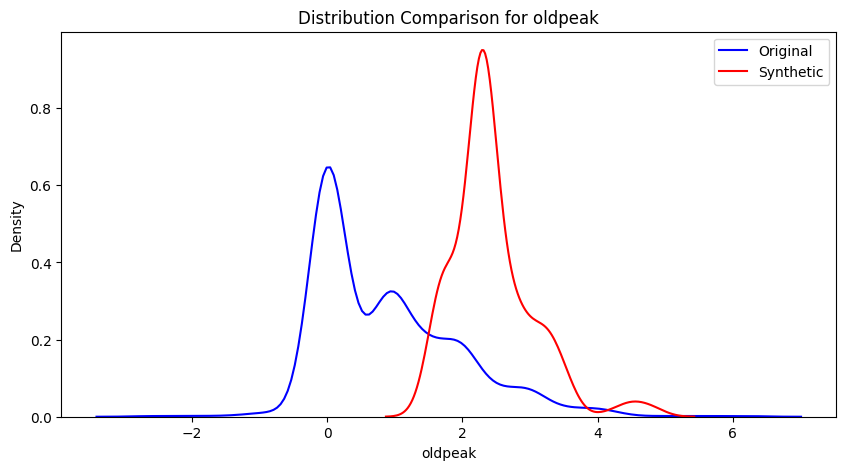

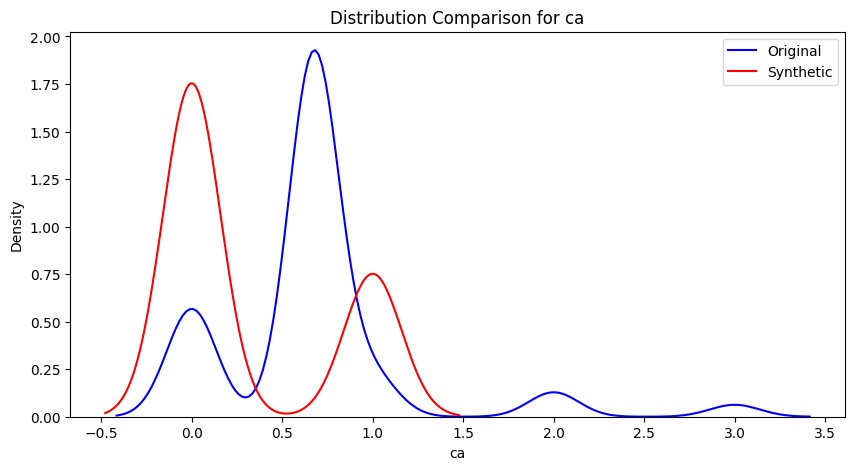

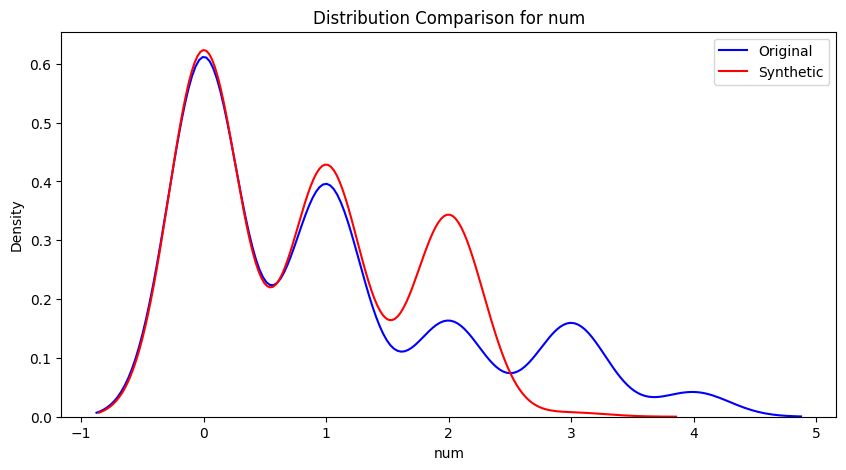

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load your datasets
original_data = pd.read_csv('/content/drive/MyDrive/TCS_Gen AI_SDG_Capstone/Code/heart_disease_uci_cleaned.csv')
synthetic_data = df_generated_cot
synthetic_data.insert(1, 'id', range(1, len(synthetic_data) + 1))


# Select only numeric columns for comparison
numeric_columns = original_data.select_dtypes(include=['number']).columns

# Update the comparison and plotting functions to use only numeric columns
def compare_summary_statistics(original, synthetic):
    return original[numeric_columns].describe() - synthetic[numeric_columns].describe()

def ks_test(original, synthetic):
    from scipy.stats import ks_2samp
    results = {}
    for column in numeric_columns:
        results[column] = ks_2samp(original[column].dropna(), synthetic[column].dropna())
    return results

def compare_correlations(original, synthetic):
    return original[numeric_columns].corr() - synthetic[numeric_columns].corr()

def plot_distributions(original, synthetic):
    import matplotlib.pyplot as plt
    import seaborn as sns
    for column in numeric_columns:
        plt.figure(figsize=(10, 5))
        sns.kdeplot(original[column].dropna(), label='Original', color='blue')
        sns.kdeplot(synthetic[column].dropna(), label='Synthetic', color='red')
        plt.title(f'Distribution Comparison for {column}')
        plt.legend()
        plt.show()

# Execute comparisons using only numeric columns
summary_comparison = compare_summary_statistics(original_data, synthetic_data)
ks_results = ks_test(original_data, synthetic_data)
correlation_difference = compare_correlations(original_data, synthetic_data)

# Display results
print("Summary Statistics Comparison:\n", summary_comparison)
print("\nKolmogorov-Smirnov Test Results:\n", ks_results)
print("\nCorrelation Differences:\n", correlation_difference)

# Plot distributions
plot_distributions(original_data, synthetic_data)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp, chisquare, energy_distance
from scipy.spatial.distance import jensenshannon
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import rbf_kernel

# Load your datasets
original_df = pd.read_csv('/content/drive/MyDrive/TCS_Gen AI_SDG_Capstone/Code/heart_disease_uci_cleaned.csv')
synthetic_df = df_generated_cot

# Define column types
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']
binary_cols = ['fbs', 'exang']

# Ensure consistent data types
for col in binary_cols:
    original_df[col] = original_df[col].astype(bool)
    synthetic_df[col] = synthetic_df[col].astype(bool)

# Preprocessing: Encode categorical variables
def preprocess_data(df):
    df_processed = df.copy()
    le_dict = {}
    for col in df_processed.columns:
        if df_processed[col].dtype == 'object' or df_processed[col].dtype == 'bool':
            le = LabelEncoder()
            df_processed[col] = le.fit_transform(df_processed[col].astype(str))
            le_dict[col] = le
    return df_processed, le_dict

original_processed, le_dict_original = preprocess_data(original_df)
synthetic_processed, le_dict_synthetic = preprocess_data(synthetic_df)

# Ensure columns are in the same order
synthetic_processed = synthetic_processed[original_processed.columns]
synthetic_processed

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,25,0,5,2,120,240,1,1,150,0,2.3,0,0,2,0
1,2,25,0,5,2,120,240,1,1,150,0,2.3,0,0,2,0
2,3,25,0,5,2,120,240,1,1,150,0,2.3,0,0,2,0
3,4,35,0,6,2,140,213,0,0,210,1,1.7,1,1,1,2
4,5,25,0,5,2,120,240,1,1,150,0,2.3,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,65,1,5,3,190,320,1,0,270,0,3.2,1,1,1,1
196,197,75,0,6,2,210,350,1,0,230,0,2.5,0,0,3,1
197,198,85,1,4,1,230,400,1,0,270,0,2.9,1,1,1,1
198,199,25,0,5,2,120,240,1,1,150,0,2.3,0,0,2,0


# Kolmogorov-Smirnov Test and Wasserstein Distance for Numerical Variables for Chain-of-Thought

<ipython-input-10-14fb7ae1fb1b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_df[col], label='Original', shade=True)
<ipython-input-10-14fb7ae1fb1b>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_df[col], label='Synthetic', shade=True)


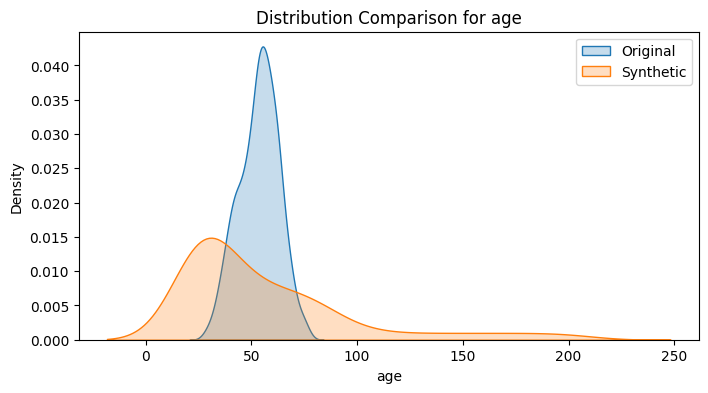

<ipython-input-10-14fb7ae1fb1b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_df[col], label='Original', shade=True)
<ipython-input-10-14fb7ae1fb1b>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_df[col], label='Synthetic', shade=True)


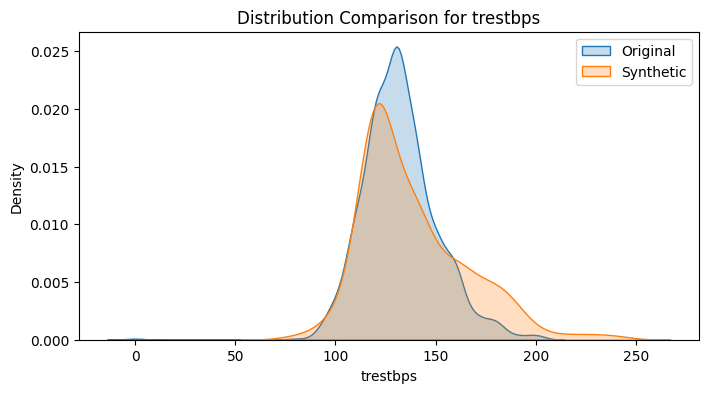

<ipython-input-10-14fb7ae1fb1b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_df[col], label='Original', shade=True)
<ipython-input-10-14fb7ae1fb1b>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_df[col], label='Synthetic', shade=True)


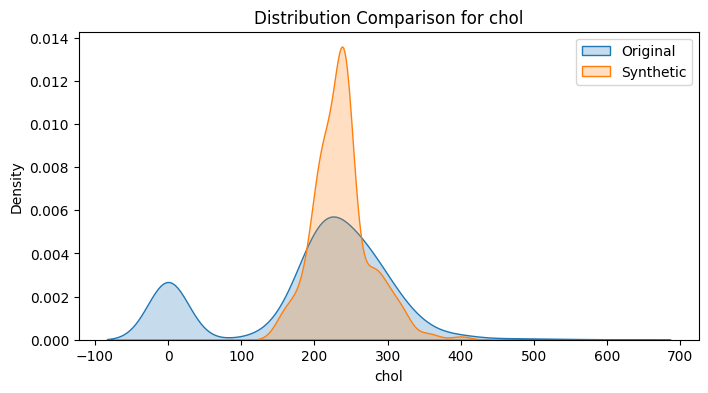

<ipython-input-10-14fb7ae1fb1b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_df[col], label='Original', shade=True)
<ipython-input-10-14fb7ae1fb1b>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_df[col], label='Synthetic', shade=True)


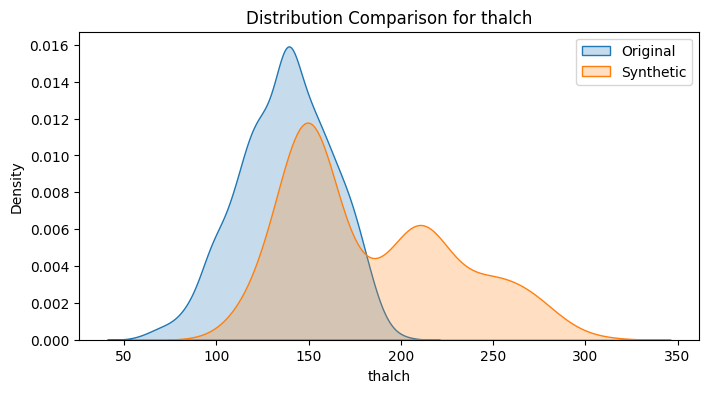

<ipython-input-10-14fb7ae1fb1b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_df[col], label='Original', shade=True)
<ipython-input-10-14fb7ae1fb1b>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_df[col], label='Synthetic', shade=True)


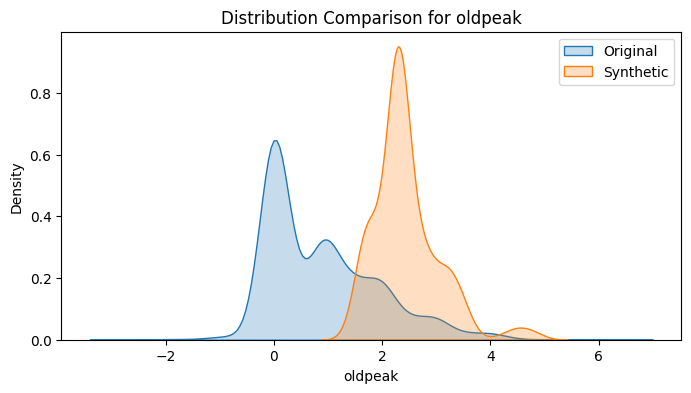

<ipython-input-10-14fb7ae1fb1b>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_df[col], label='Original', shade=True)
<ipython-input-10-14fb7ae1fb1b>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_df[col], label='Synthetic', shade=True)


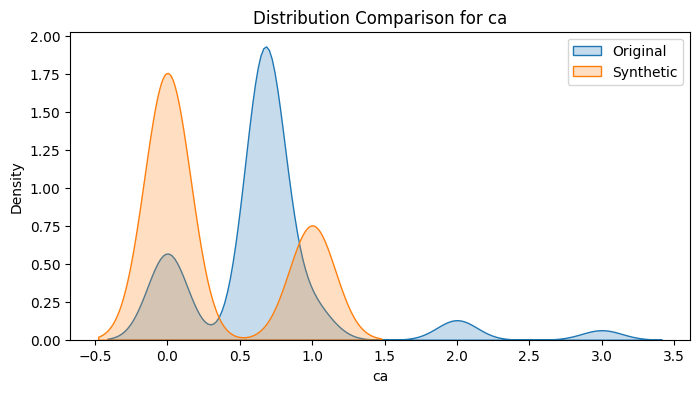

     Column  KS Statistic     KS p-value  Wasserstein Distance
0       age      0.455217   2.210974e-31             22.990217
1  trestbps      0.153913   7.295348e-04              8.593683
2      chol      0.273696   2.429210e-11             53.483141
3    thalch      0.542174   3.362579e-45             46.154335
4   oldpeak      0.773043  9.260076e-100              1.570930
5        ca      0.503261   1.210188e-38              0.480498


In [ ]:
def compare_numerical_distributions(original_df, synthetic_df, columns):
    distribution_metrics = []
    for col in columns:
        ks_stat, ks_p_value = ks_2samp(original_df[col], synthetic_df[col])
        wd = wasserstein_distance(original_df[col], synthetic_df[col])
        distribution_metrics.append({
            'Column': col,
            'KS Statistic': ks_stat,
            'KS p-value': ks_p_value,
            'Wasserstein Distance': wd
        })
        # Plot distributions
        plt.figure(figsize=(8, 4))
        sns.kdeplot(original_df[col], label='Original', shade=True)
        sns.kdeplot(synthetic_df[col], label='Synthetic', shade=True)
        plt.title(f'Distribution Comparison for {col}')
        plt.legend()
        plt.show()
    return pd.DataFrame(distribution_metrics)

numerical_distribution_metrics = compare_numerical_distributions(
    original_processed, synthetic_processed, numerical_cols)
print(numerical_distribution_metrics)

# **2. Machine Learning Utility Metrics**



# 1) Train on Original, Test on Synthetic (TSOR)

TRAIN ON ORIGINAL, TEST ON SYNTHETIC Evaluation:
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        89
           1       1.00      0.02      0.03        61
           2       0.00      0.00      0.00        49
           3       0.00      0.00      0.00         1

    accuracy                           0.45       200
   macro avg       0.36      0.25      0.16       200
weighted avg       0.50      0.45      0.28       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


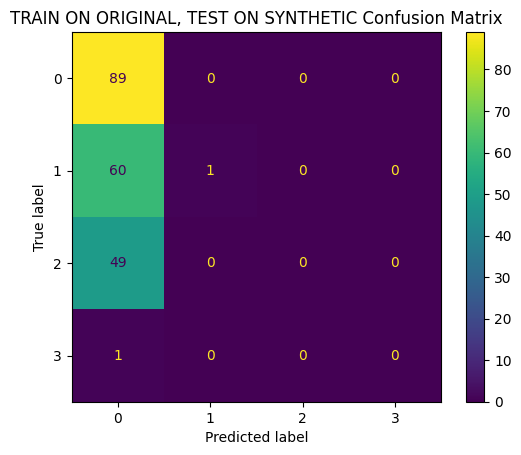

In [ ]:
# Define target and features
target_column = 'num'
feature_columns = [col for col in original_processed.columns if col != target_column]

# Split the original data
X_orig = original_processed[feature_columns]
y_orig = original_processed[target_column]
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(
    X_orig, y_orig, test_size=0.3, random_state=42)

# Prepare synthetic data
X_synth = synthetic_processed[feature_columns]
y_synth = synthetic_processed[target_column]


# TSOR: Train on Original, Test on Synthetic
model_tsor = RandomForestClassifier(n_estimators=100, random_state=42)
model_tsor.fit(X_orig_train, y_orig_train)
y_pred_tsor = model_tsor.predict(X_synth)
print("TRAIN ON ORIGINAL, TEST ON SYNTHETIC Evaluation:")
print(classification_report(y_synth, y_pred_tsor))

# Plot confusion matrices


# TSOR Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_synth, y_pred_tsor)
plt.title('TRAIN ON ORIGINAL, TEST ON SYNTHETIC Confusion Matrix')
plt.show()

# 3. Correlation Analysis

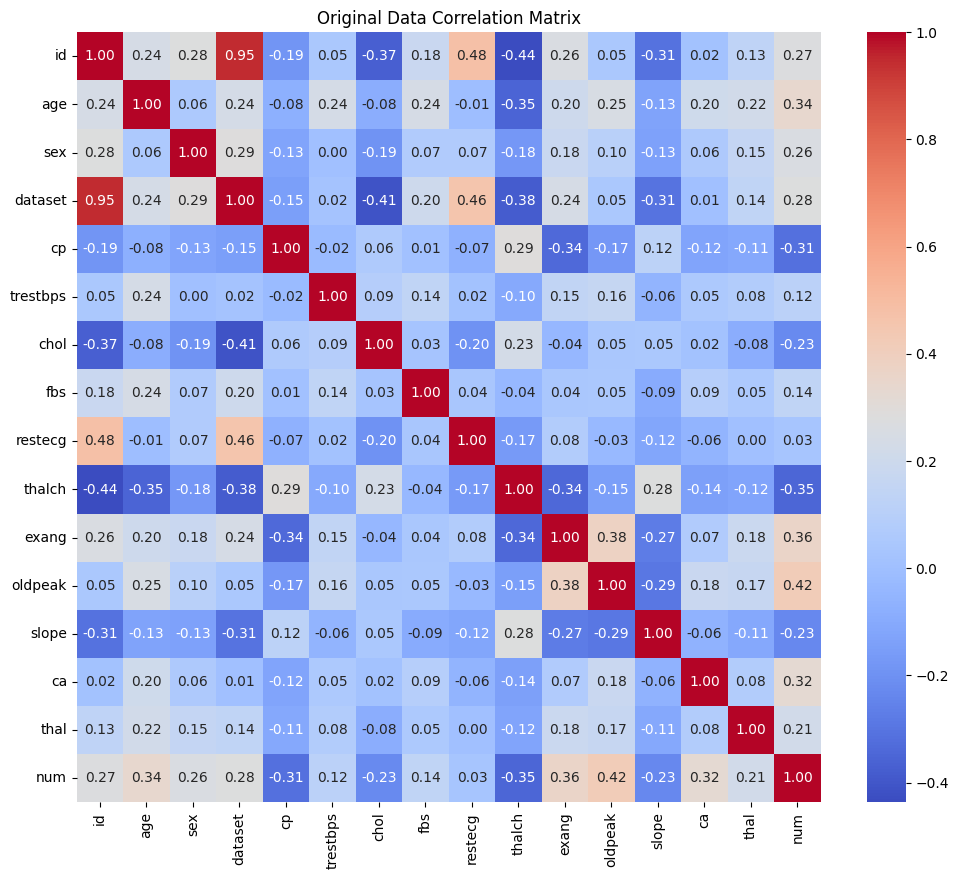

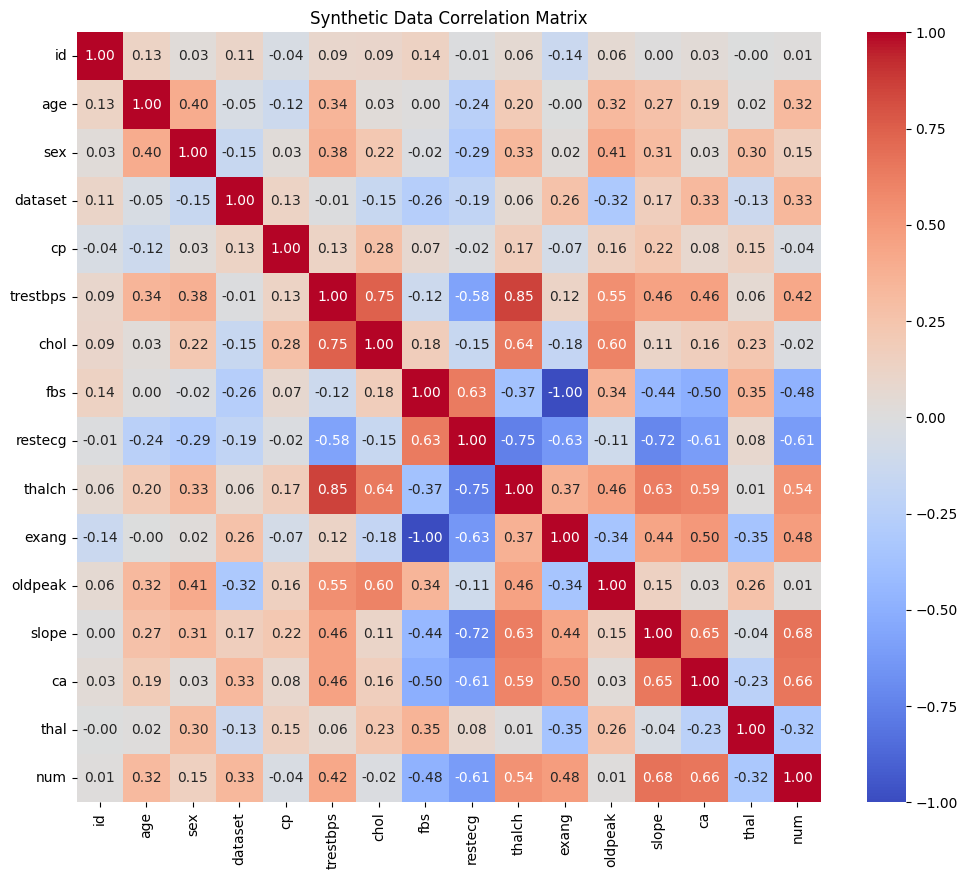

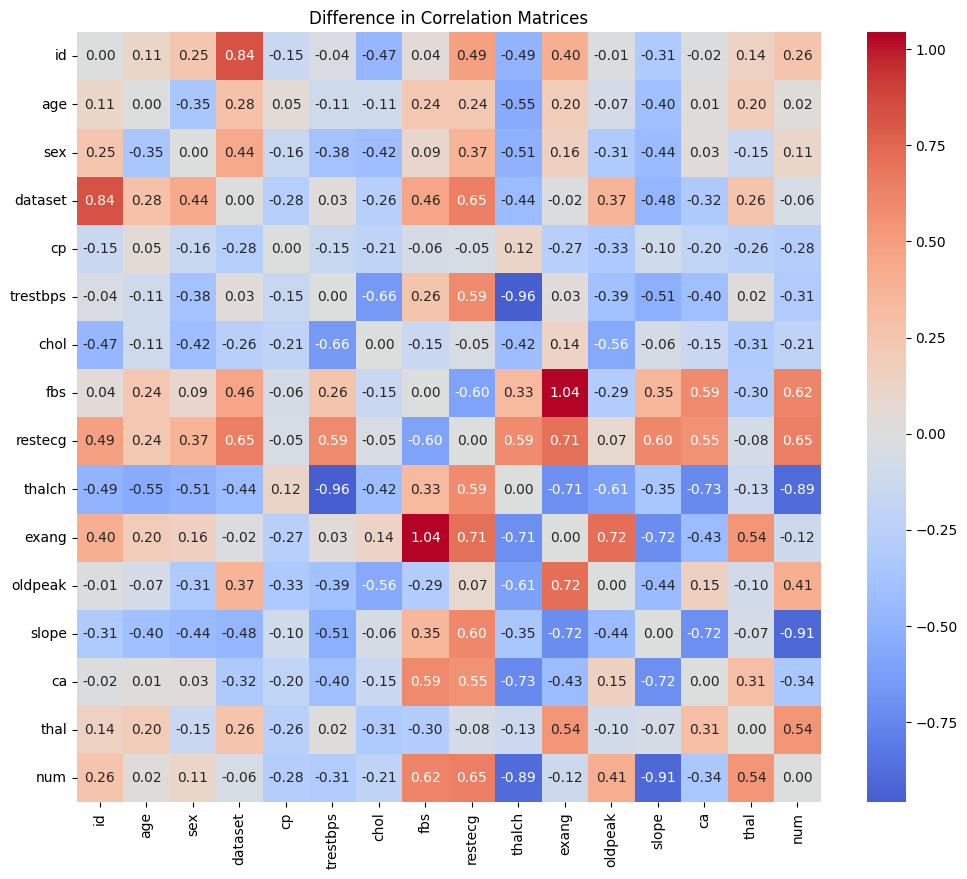

In [ ]:
# Compute correlation matrices
corr_original = original_processed.corr()
corr_synthetic = synthetic_processed.corr()

# Difference between the correlation matrices
corr_diff = corr_original - corr_synthetic

# Visualize the original correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_original, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Original Data Correlation Matrix')
plt.show()

# Visualize the synthetic correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_synthetic, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Synthetic Data Correlation Matrix')
plt.show()

# Visualize the difference
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Difference in Correlation Matrices')
plt.show()


 **4. Distribution Comparison using Divergence measures**

a) Kullback-Leibler (KL) Divergence

KL Divergence for sex: 0.5219591209636844
KL Divergence for cp: 0.9786365249661255
KL Divergence for restecg: 4.077817434036834
KL Divergence for slope: 6.35234826570337
KL Divergence for thal: 0.560520481208187
KL Divergence for fbs: 0.6854199967318665
KL Divergence for exang: 0.03756796632476872


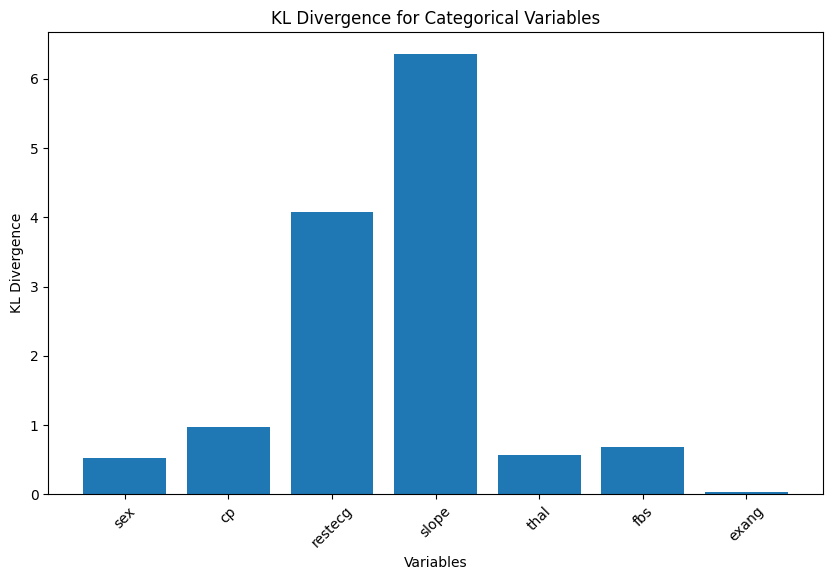

In [ ]:
def compute_kl_divergence(p, q):
    epsilon = 1e-10
    p = p + epsilon
    q = q + epsilon
    return np.sum(p * np.log(p / q))

kl_divergences = {}

for col in categorical_cols + binary_cols:
    orig_counts = original_processed[col].value_counts(normalize=True).sort_index()
    synth_counts = synthetic_processed[col].value_counts(normalize=True).sort_index()
    all_categories = orig_counts.index.union(synth_counts.index)
    p = orig_counts.reindex(all_categories, fill_value=0).values
    q = synth_counts.reindex(all_categories, fill_value=0).values
    kl_div = compute_kl_divergence(p, q)
    kl_divergences[col] = kl_div
    print(f"KL Divergence for {col}: {kl_div}")

# Plot KL Divergences
plt.figure(figsize=(10, 6))
plt.bar(kl_divergences.keys(), kl_divergences.values())
plt.title('KL Divergence for Categorical Variables')
plt.xlabel('Variables')
plt.ylabel('KL Divergence')
plt.xticks(rotation=45)
plt.show()